
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png"
  />
  <center>Cifar 10 資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>

## 1: 切換 TensorFlow 版本至 2.x

In [0]:
%tensorflow_version 2.x

## 2: 載入套件及資料集

In [0]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

## 3: 資料前處理 (Data Preprocessing)

CIFAT 10 是包含 10 種類的彩色小圖資料集，每張圖的尺寸為 $32\times32$

10 個類別分別是：飛機、交通工具、鳥、貓、鹿、狗、青蛙、馬、船、卡車

讀取 CIFAR 10 資料集

In [0]:
name_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
# Load CIFAR 10
(X_train, y_train0), (X_test, y_test0) = datasets.cifar10.load_data()

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)

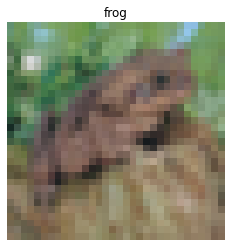

In [0]:
idx = np.random.randint(X_train.shape[0])
X_sample = X_train[idx]
y_sample = y_train0[idx].squeeze()

plt.imshow(X_sample)
plt.title(name_list[y_sample])
plt.axis('off');

## 4: 建立用於分類 CIFAR 10 的卷積神經網路

在這個部分，我們將逐步帶領大家建立經典的 CNN 模型 LeNet-5 的變形。

LeNet-5 分成兩個部分，分別為卷積層與全連接層，兩部份之間是透過扁平層 (Flatten) ，將卷積層最後輸出的 2 維向量壓扁成 1 維向量。

In [0]:
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Second convolutional block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPool2D())

# Third convolutional block
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(GlobalAveragePooling2D())

# Fully-connected layers as a classfier
model.add(Dense(units=256, activation='relu'))

# Ouput layer: # of neurons = # of classes with softmax activation
model.add(Dense(units=10, activation='softmax'))

In [0]:
model.summary()

### 編譯模型: 設定模型訓練時的設定

- Optimizer: Stochastic Gradient Descent (SGD)
- Loss: categorical cross-entropy 

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(),
              metrics=['categorical_accuracy'])

### 訓練模型: 透過訓練來學習分類資料的函數

In [0]:
# model.fit(X_train, y_train, 
#           batch_size=128, 
#           epochs=20,
#           validation_data=(X_test, y_test)
#           )

In [0]:
model.save_weights('LeNet5_CIFAR10.h5')

### 模型預測: 預測資料集的準確率

In [0]:
model.load_weights('LeNet5_CIFAR10.h5')

score_train = model.evaluate(X_train, y_train)
score_test = model.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

## 5: 另一種使用 Sequential 建立模型的方式

In [0]:
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]

In [0]:
model_2 = Sequential(CNN_layers+FC_layers)
model_2.summary()

####  與使用 `model.add` 建立模型的差異？

In [0]:
model_2.compile(loss='categorical_crossentropy', 
                optimizer=Adam(),
                metrics=['categorical_accuracy'])

model_2.load_weights('LeNet5_CIFAR10.h5')

In [0]:
score_train = model_2.evaluate(X_train, y_train, batch_size=1024)
score_test = model_2.evaluate(X_test, y_test, batch_size=1024)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

## 6: 遷移學習 (Transfer Learning) 中的 Layer Transfer 的技巧

In [0]:
# Load CIFAR 100
(U_train, v_train0), (U_test, v_test0) = datasets.cifar100.load_data()

# Normalize the range of featurs
U_train = U_train / U_train.max()
U_test = U_test / U_test.max()

# One-hot encoding of Fashion MNIST
v_train = to_categorical(v_train0, 100)
v_test = to_categorical(v_test0, 100)

LeNet-5 for CIFAR-10 (model_2)
```
CNN_layers = [Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', name='Conv_1'),
              MaxPool2D(),
              Conv2D(128, (3, 3), padding='same', activation='relu', name='Conv_2'),
              MaxPool2D(),
              Conv2D(512, (3, 3), padding='same', activation='relu', name='Conv_3'),
              GlobalAveragePooling2D()]

FC_layers = [Dense(units=256, activation='relu'),
             Dense(units=10, activation='softmax')]
```

LeNet-5 for CIFAR-100
```
# From LeNet-5 for CIFAR-10
CNN_layers

# New FC layers for CIFAR-100
FC_layers_CF100 = [Dense(units=256, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=100, activation='softmax')]
```
CNN_layers 是跟人家**借**來的。

In [0]:
FC_layers_CF100 = [Dense(units=256, activation='relu'),
                   Dense(units=128, activation='relu'),
                   Dense(units=100, activation='softmax')]

In [0]:
model_CF100 = Sequential(CNN_layers+FC_layers_CF100)
model_CF100.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

對照一下和 LeNet-5 for CIFAR-10 的差別

In [0]:
model_2.summary()

### 遷移學習的訓練方式
* Fine-tune: 新資料集的樣本數夠多，整個模型重新訓練
* Frozen: 當新資料集的樣本數不夠多，凍結借來的部分，只針對新建立的神經網路層訓練

In [0]:
for layer in CNN_layers:
    layer.trainable = False

In [0]:
model_CF100.summary()

In [0]:
model_CF100.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(),
                    metrics=['categorical_accuracy'])

model_CF100.fit(U_train, v_train,
                batch_size=128, 
                epochs=1,
                validation_data=(U_test, v_test)
                )

### 借來的神經網路 (的權重) 會如何變化？Frozen 的場合

In [0]:
score_train = model_2.evaluate(X_train, y_train)
score_test = model_2.evaluate(X_test, y_test)

print(f'Train Accuracy: {score_train[1]*100}')
print(f'Test Accuracy: {score_test[1]*100}')

### 借來的神經網路 (的權重) 會如何變化？Fine-tune 的場合

In [0]:
for layer in CNN_layers:
    layer.trainable = True

model_CF100.fit(U_train, v_train,
                batch_size=128, 
                epochs=5,
                validation_data=(U_test, v_test)
                )

使用 Layer Transfer 的注意事項
1. 若目的不同 (如；分類總數不同)，則須重新定義不同的全連接層
2. 若資料的輸入尺寸不同 (如：channel 數不同)，則也需針對輸入的部分調整

雖然這個模型看起來很隨便，但轉移學習的模型**差不多**都是這樣建立的，實際上， Keras 亦提供許多被證實有良好表現且訓練好 (pre-trained) 的模型，如:

* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet

詳細的使用方式可參考 Keras Documentation: https://keras.io/applications/

但使用這些模型進行轉移學習，**可能**需要 ``Sequential`` 以外寫法，以及更多神經網路的建構技巧。

## [NOT FINISHED] 遷移學習的實作，以 Class Activation Map (CAM) 為例

In [0]:
FC_layers_new = [Dense(units=10, activation='softmax')]

In [0]:
classifier = Sequential(CNN_layers+FC_layers_new)
classifier.compile(loss='categorical_crossentropy', 
                   optimizer=Adam(),
                   metrics=['categorical_accuracy'])
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)               

In [0]:
model.fit(X_train, y_train, 
          batch_size=128, 
          epochs=20,
          validation_data=(X_test, y_test)
          )

In [0]:
CAM_model = Sequential(CNN_layers[:-1]+FC_layers_new)
CAM_model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(),
                  metrics=['categorical_accuracy'])
CAM_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 8, 8, 512)         590336    
_________________________________________________________________
dense_12 (Dense)             multiple                  5130      
Total params: 633,354
Trainable params: 633,354
Non-trainable params: 0
_______________________________________________

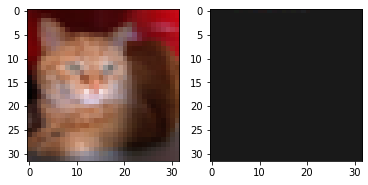

In [0]:
from PIL import Image
CAM = CAM_model.predict(X_train[idx:idx+1])[0, : ,: , y_sample]
CAM.resize(X_sample.shape)

plt.subplot(1, 2, 1)
plt.imshow(X_sample)

plt.subplot(1, 2, 2)
plt.imshow(np.clip(CAM, 0.1, 1), 'gray_r')

In [0]:
np.clip(CAM, 0.1, 1)

array([[0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       ],
       [0.12071457, 0.1       , 0.11357061, 0.1       , 0.1       ,
        0.1       , 0.10532729, 0.1       ],
       [0.10987107, 0.10232778, 0.1       , 0.1       , 0.10549945,
        0.12811796, 0.12720664, 0.10187284],
       [0.107051  , 0.13169208, 0.1       , 0.1       , 0.1       ,
        0.1210372 , 0.12632339, 0.11793717],
       [0.1       , 0.11684094, 0.10440911, 0.1       , 0.11002783,
        0.11910338, 0.11852513, 0.10015   ],
       [0.1133763 , 0.10758757, 0.11185651, 0.11523668, 0.1216599 ,
        0.10326762, 0.1122153 , 0.1060672 ],
       [0.11666509, 0.12236123, 0.12577349, 0.13925031, 0.12089453,
        0.10160585, 0.10003033, 0.1       ]], dtype=float32)

In [0]:
class_intensity = FC_layers_new[0].get_weights()[0][:, y_sample]

In [0]:
CAM_model.predict(X_train[idx:idx+1]).shape

(1, 8, 8, 10)